# Weight Prediction

Given dataset  is a collection of heights and weights of some people.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sn

In [2]:
df=pd.read_csv('height-weight.csv')
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [3]:
df.shape

(15, 2)

In [4]:
df.count()

Height    15
Weight    15
dtype: int64

In [5]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

In [6]:
df.describe()

,Height,Weight
count,15.000000,15.000000
mean,1.650667,62.078000
std,0.114235,7.037515
min,1.470000,52.210000
25%,1.560000,56.520000
50%,1.650000,61.290000
75%,1.740000,67.190000
max,1.830000,74.460000


In [7]:
df.corr()

,Height,Weight
Height,1.000000,0.994584
Weight,0.994584,1.000000


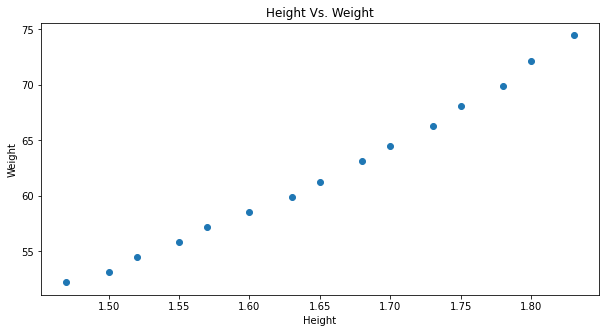

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
plt.title("Height Vs. Weight")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.scatter(df.Height, df.Weight)
plt.show()

In [9]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [10]:
x

array([[1.47],
       [1.5 ],
       [1.52],
       [1.55],
       [1.57],
       [1.6 ],
       [1.63],
       [1.65],
       [1.68],
       [1.7 ],
       [1.73],
       [1.75],
       [1.78],
       [1.8 ],
       [1.83]])

In [11]:
y

array([52.21, 53.12, 54.48, 55.84, 57.2 , 58.57, 59.93, 61.29, 63.11,
       64.47, 66.28, 68.1 , 69.92, 72.19, 74.46])

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=0)

In [13]:
print(xtrain.shape)

(11, 1)


In [14]:
xtest.shape

(4, 1)

In [15]:
ytrain.shape

(11,)

In [16]:
ytest.shape

(4,)

In [17]:
cls =LinearRegression()
#Fit method is used for fitting your training data into the model
cls.fit(xtrain,ytrain)

LinearRegression()

In [18]:
prediction=cls.predict(xtest)
prediction

array([52.96743803, 60.98273152, 64.06553672, 65.29865879])

In [19]:
#Parameters used for the model 
cls.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [20]:
print('Co-efficient of linear regression',cls.coef_)

Co-efficient of linear regression [61.65610384]


In [21]:
print('Intercept of linear regression model',cls.intercept_)

Intercept of linear regression model -39.51671772684755


In [22]:
print('Mean Square Error', metrics.mean_squared_error(ytest, prediction))

Mean Square Error 0.6828111578705105


In [24]:
print('Model R^2 square value',metrics.r2_score(ytest,prediction))

Model R^2 square value 0.9644799660895075


Text(0.5, 1.0, 'Linear Regression')

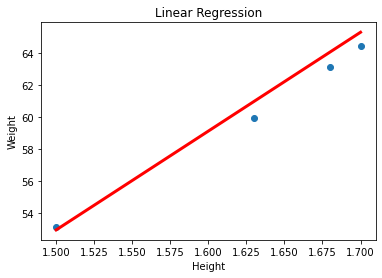

In [26]:
#Model regression line on test set
plt.scatter(xtest,ytest)
plt.plot(xtest,prediction,color='red',linewidth=3)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Linear Regression')

Text(0, 0.5, 'Residual')

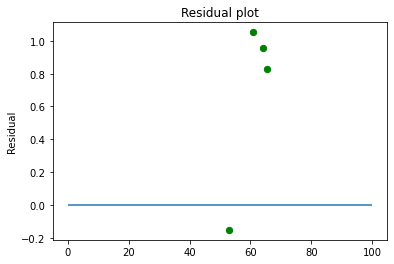

In [28]:
#Residual plot
plt.scatter(cls.predict(xtest),cls.predict(xtest)-ytest,c='g',s=40)
plt.hlines(y=0,xmin=0,xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')